**Problem Statement**

A large MNC is facing problem in identifying the right people for promotion (only for manager position and below) and prepare them in time.

Currently the process, they are following is:

1. They first identify a set of employees based on recommendations/ past performance.
2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical.
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion.


For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 
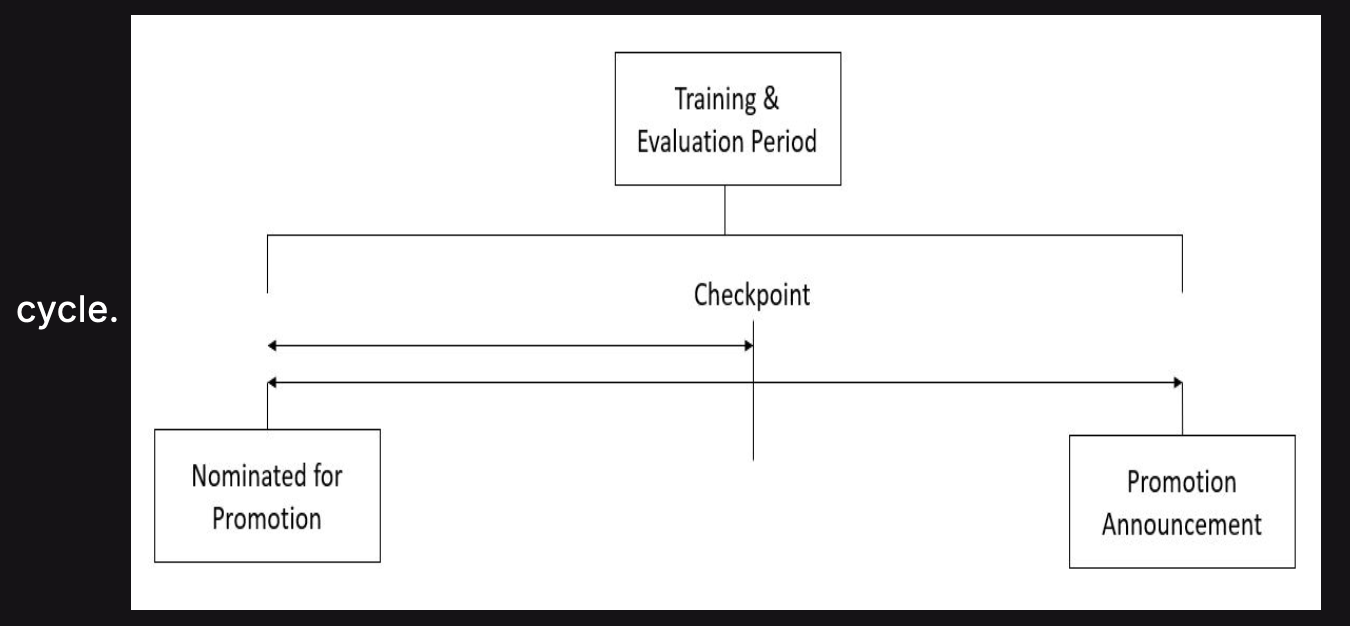

**objective**

The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


**Evaluation Metric**

The evaluation metric for this competition is **F1 Score**
.

**Understand the data** 

**Variable - Description**


**independent variables (or) features**
* employee_id               - Unique ID for employee
* department                - Department of employee
* region                    - Region of employment (unordered)
* education                 - Education Level
* gender                    - Gender of Employee
* recruitment_channel       - Channel of recruitment for employee
* no_of_trainings           - no of other trainings completed in previous year on soft skills, technical skills etc.
* age                       - Age of Employee
* previous_year_rating      - Employee Rating for the previous year
* length_of_service         - Length of service in years 
* KPIs_met >80%             - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
* awards_won?               - if awards won during previous year then 1 else 0
* avg_training_score        - Average score in current training evaluations

**dependent variable (or) Target** --> **is_promoted**

* 0 - Not recommended for promotion 
* 1 - Recommended for promotion

  

In [3]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [7]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [11]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
# indentifying the shape of the datasets
train.shape,test.shape,submission.shape

((54808, 14), (23490, 13), (23490, 2))

In [13]:
# Describing Train Dataset and undering the datatypes used
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [15]:
# Displaying the columns used in the Train, Test and Submission Datasets
print('\nTrain-Columns: \n',train.columns,'\n')
print('Test-Columns: \n',test.columns,'\n')
print('Submission-Columns: \n',submission.columns)


Train-Columns: 
 Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object') 

Test-Columns: 
 Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object') 

Submission-Columns: 
 Index(['employee_id', 'is_promoted'], dtype='object')


In [16]:
# Column difference b/w Train and Test dataset
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [17]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [18]:
# Describing numberical columns to understand the data distribution and outlier impact
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [20]:
# Identifying null values in train dataset
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

The train dataset only having null values for columns/features -- **education** & **previous_year_rating**

In [22]:
# Identifying % of null values in train dataset
(train.isna().sum()/train.shape[0]*100).sort_values(ascending=False)

previous_year_rating    7.524449
education               4.395344
employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [23]:
# Identifying duplicate data in Train dataset
train.duplicated().sum()

0

In [24]:
# Identifying the distribution of Target data
train['is_promoted'].value_counts()


is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [25]:
# This Seems to be imbalanced Dataset
# Identifying % of imbalanced Target data distribution
print(train['is_promoted'].value_counts()/train.shape[0]*100) # Manual calculation
train['is_promoted'].value_counts(normalize=True) # Using normalize parameter in value_counts

is_promoted
0    91.482995
1     8.517005
Name: count, dtype: float64


is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64

The Target **is_promoted** is purely **imbalanced** data where  
* ~91.5% is not recommended for promotion
* ~8.5% is Recommended for promotion

<Axes: xlabel='is_promoted'>

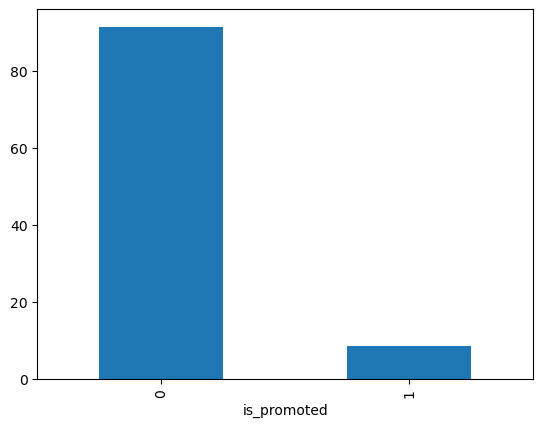

In [27]:
# Plotting Target data distribution base on %
(train['is_promoted'].value_counts()/train.shape[0]*100).plot(kind='bar')

In [28]:
# Identifying Unique values in each column
print('Printing Unique number of values in each column:')
for col in train.columns:
    print(col,'--> ',train[col].nunique())

Printing Unique number of values in each column:
employee_id -->  54808
department -->  9
region -->  34
education -->  3
gender -->  2
recruitment_channel -->  3
no_of_trainings -->  10
age -->  41
previous_year_rating -->  5
length_of_service -->  35
KPIs_met >80% -->  2
awards_won? -->  2
avg_training_score -->  61
is_promoted -->  2


In [29]:
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [30]:
trg_col = ['is_promoted']
ign_cols = ['employee_id']

In [31]:
for col in train.drop(columns=ign_cols).columns:
    print(col,'-->',train[col].nunique(),'\n',train[col].unique(),'\n')

department --> 9 
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal'] 

region --> 34 
 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18'] 

education --> 3 
 ["Master's & above" "Bachelor's" nan 'Below Secondary'] 

gender --> 2 
 ['f' 'm'] 

recruitment_channel --> 3 
 ['sourcing' 'other' 'referred'] 

no_of_trainings --> 10 
 [ 1  2  3  4  7  5  6  8 10  9] 

age --> 41 
 [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21] 

previous_year_rating --> 5 
 [ 5.  3.  1.  4. nan  2.] 

length_of_service --> 35 
 [ 

In [32]:
train.isna().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [33]:
val = train.isna().sum().sort_values(ascending=False)
val[val>0]

previous_year_rating    4124
education               2409
dtype: int64

In [34]:
train.columns[train.isna().sum() > 0]

Index(['education', 'previous_year_rating'], dtype='object')

In [35]:
train.dtypes[train.columns[train.isna().sum() > 0]]

education                object
previous_year_rating    float64
dtype: object

In [36]:
for col in train.columns[train.isna().sum() > 0].values:
    print(col,'-->',train[col].nunique(),'\n',train[col].unique())

education --> 3 
 ["Master's & above" "Bachelor's" nan 'Below Secondary']
previous_year_rating --> 5 
 [ 5.  3.  1.  4. nan  2.]


no_of_trainings


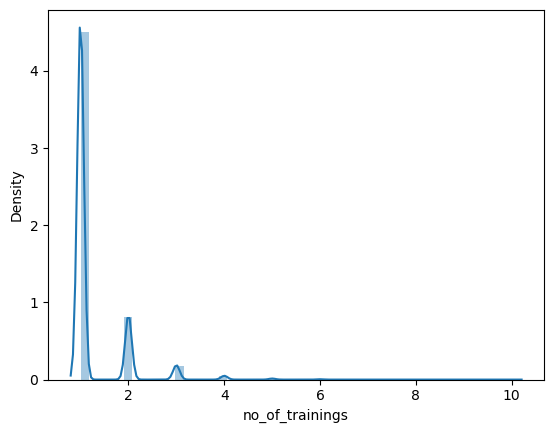

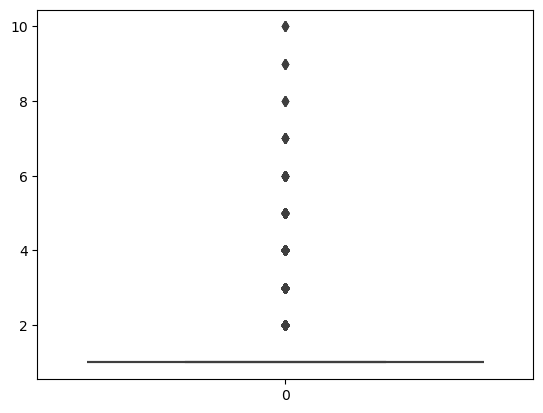

age


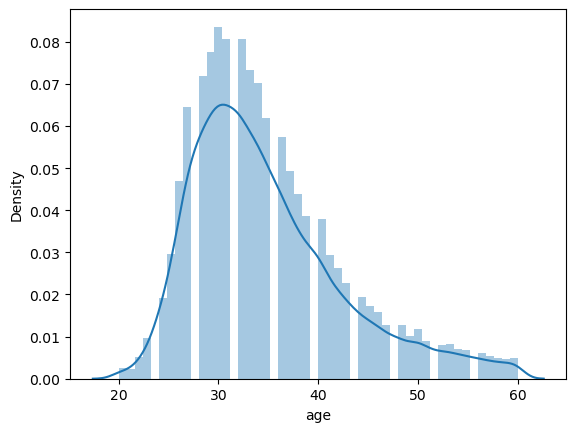

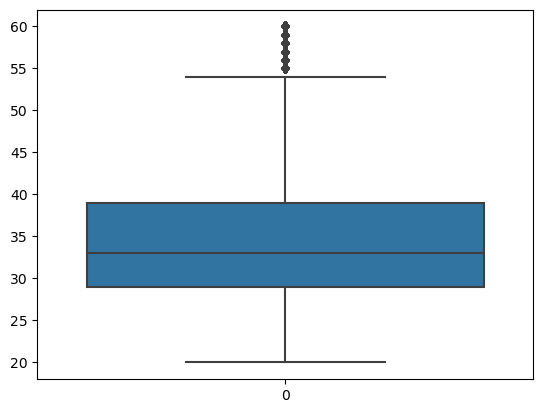

previous_year_rating


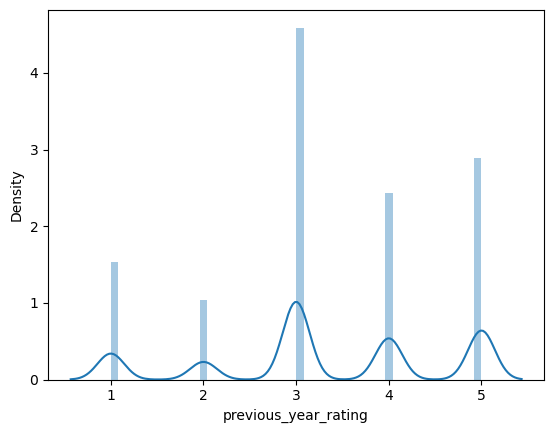

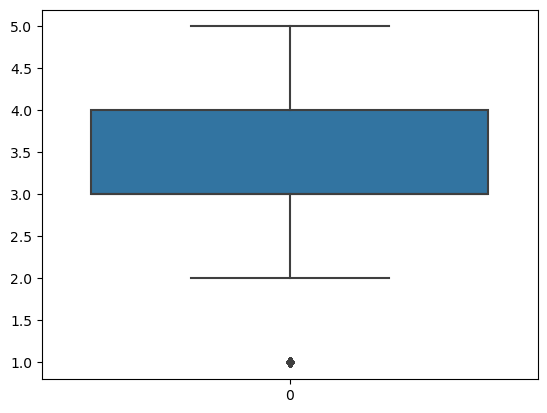

length_of_service


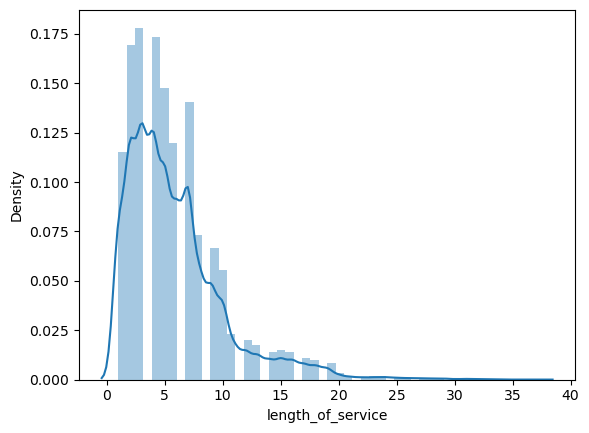

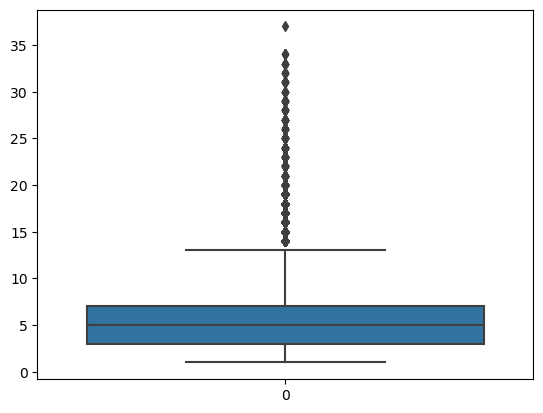

KPIs_met >80%


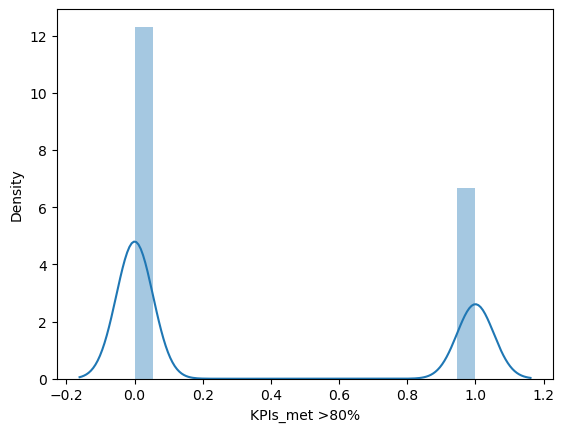

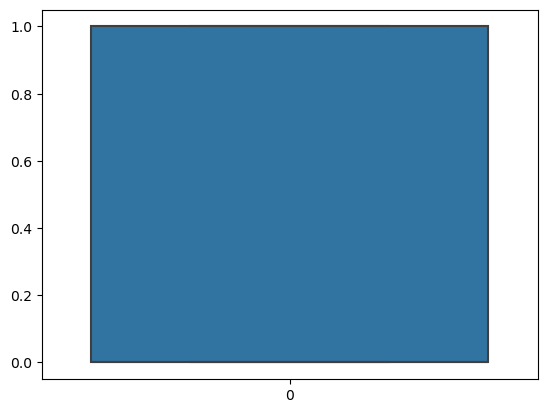

awards_won?


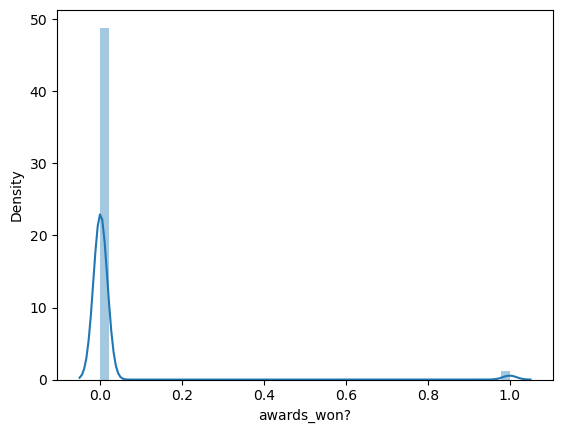

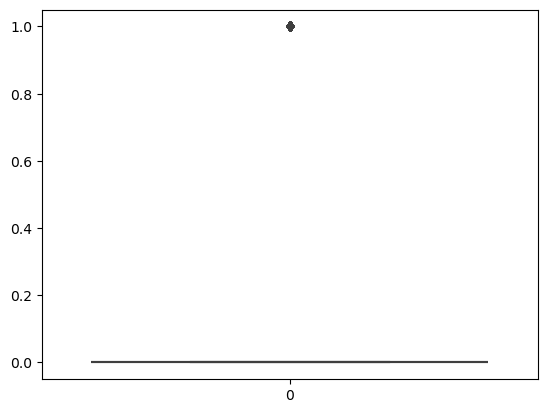

avg_training_score


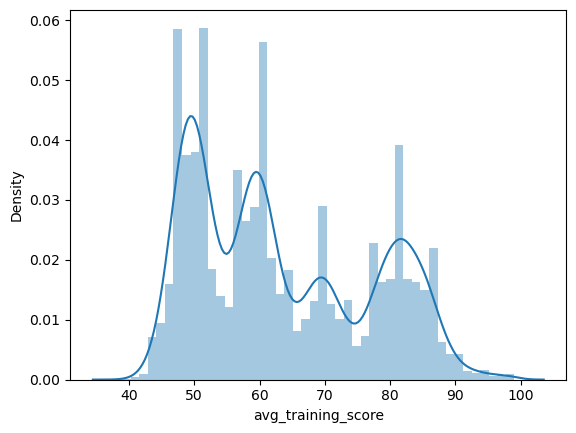

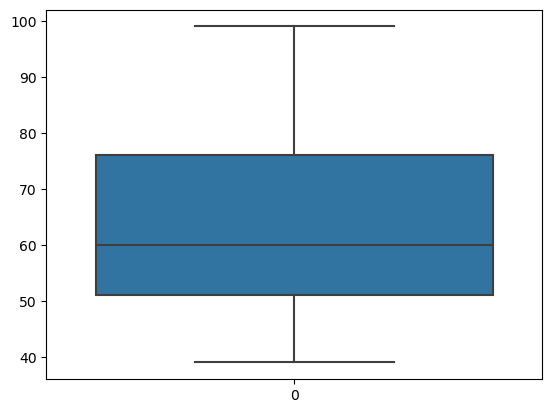

is_promoted


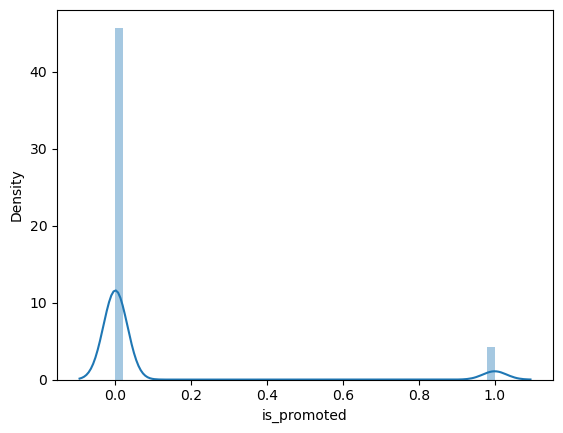

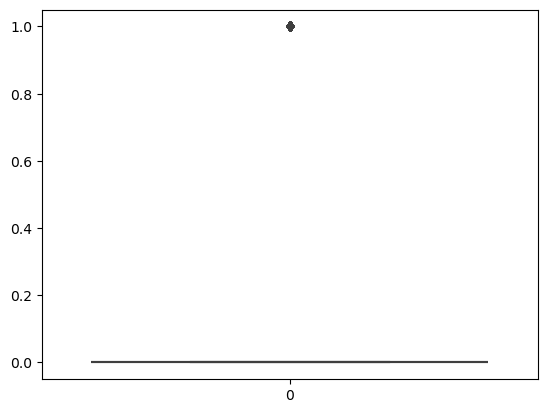

In [37]:
# Plot visualazation on non-object cols
for col in train.select_dtypes(exclude='object').drop(columns=ign_cols).columns:
    print(col)
    sns.distplot(train[col])
    plt.show()
    sns.boxplot(train[col])
    plt.show()

**Discriptive stats on non-object columns**

* no_of_trainings:
                - Majority of the employees have completed only 1 training
                - Very few employees completed more than 2 trainings.
* age:
                - Majority of the employees age is b/w 25-45
* previous_year_rating:
                - Majority of the employees recieved 3 rating from the previous_year_rating
* length_of_service:
                - Majority of the employees in the org served about 1-7 years
                - Very few employees served above 10 years
* KPIs_met >80%:
                - Majority of the employees in the org didn't meet the >80% KPI.
* awards_won:
                - Majority of the employees in the org didn't get any awards and only few employees recieved awards
* avg_training_score:
                - The avg_training_score was b/w 40 - 90%     


department
Sales & Marketing    0.307254
Operations           0.207050
Technology           0.130236
Procurement          0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: proportion, dtype: float64


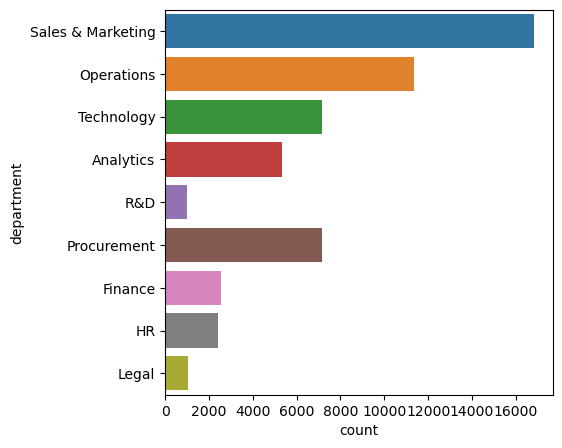

region
region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32    0.017242
region_19    0.015947
region_20    0.015509
region_14    0.015089
region_25    0.014943
region_17    0.014523
region_5     0.013976
region_6     0.012589
region_30    0.011987
region_8     0.011951
region_10    0.011823
region_1     0.011130
region_24    0.009269
region_12    0.009123
region_9     0.007663
region_21    0.007499
region_3     0.006313
region_34    0.005328
region_33    0.004908
region_18    0.000566
Name: proportion, dtype: float64


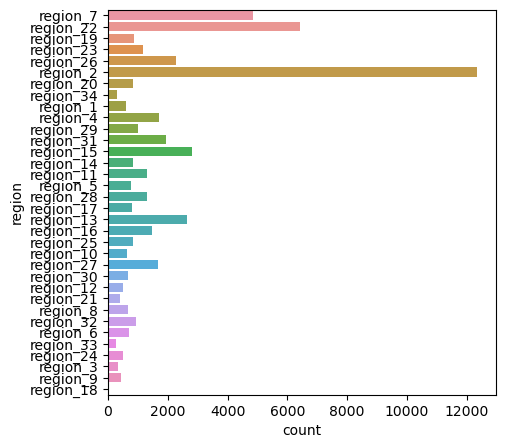

education
Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: proportion, dtype: float64


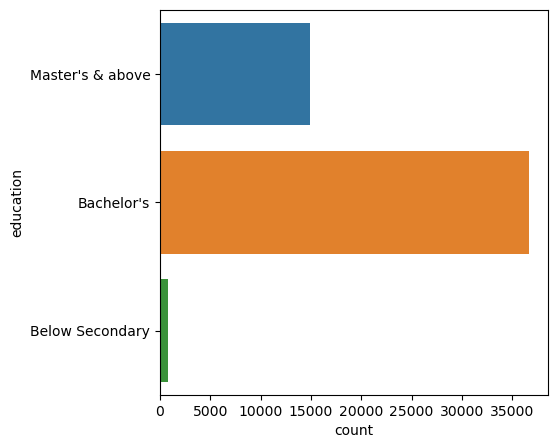

gender
m    0.702379
f    0.297621
Name: proportion, dtype: float64


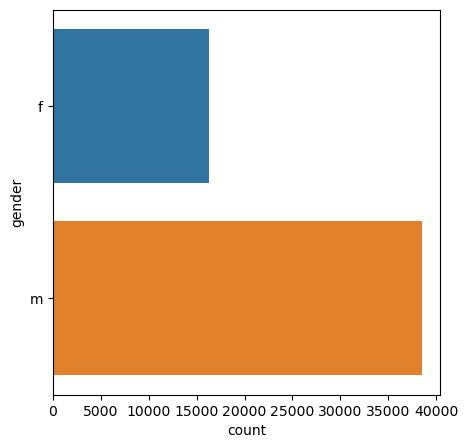

recruitment_channel
other       0.555503
sourcing    0.423661
referred    0.020836
Name: proportion, dtype: float64


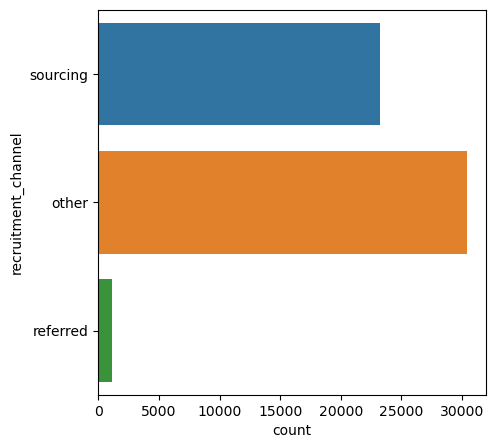

In [39]:
# Plot visualazation on object cols
for col in train.select_dtypes(include='object').columns:
    # print(col)
    print(train[col].value_counts(normalize=True).sort_values(ascending=False))
    plt.figure(figsize=(5,5))
    sns.countplot(y=train[col])
    plt.show()

**Discriptive stats on object columns**

* Department:
          - Majority of the employees are from Sales & Marketin dept
          - Legal and R&D dept holds lesser number of employees
* region:
          - Majority of the employees are from region_2
* education:
          - Majority of the employees finished their Bachelor's ~70% of employees are Bachelor degree holder , then goes with "Master's & above" ~28% and very few with "Below Secondary" 
* gender:
          - Majority of the employees in this org are "Male" ~70% followed by "female" employees with ~30%.
* recruitment_channel:
          - Majority of the employees joined this org through sourcing (~55%) & others (~42%)
          - only few employees joined via refferal (referred - ~0.02%)



In [41]:
train[['KPIs_met >80%','is_promoted']].groupby('KPIs_met >80%').value_counts().unstack()

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


In [42]:
train[['KPIs_met >80%','is_promoted']].groupby('KPIs_met >80%').value_counts().unstack()[1]

KPIs_met >80%
0    1406
1    3262
Name: 1, dtype: int64

In [43]:
exp_tgt=train[['KPIs_met >80%','is_promoted']].groupby('KPIs_met >80%').value_counts().unstack()
exp_tgt['%']= exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2],ascending=False)

is_promoted,0,1,%
KPIs_met >80%,,,
1,16029,3262,16.909440
0,34111,1406,3.958668


In [44]:
exp_tgt

is_promoted,0,1,%
KPIs_met >80%,,,
0,34111,1406,3.958668
1,16029,3262,16.909440


In [45]:
exp_tgt[1].sum()

4668

In [46]:
exp_tgt[1][0],exp_tgt[1][1]

(1406, 3262)

In [47]:
print(f"{round((exp_tgt[1][0]/(exp_tgt[1][0]+exp_tgt[1][1])*100),2)}% of employees got promoted who didn't complete 80% of KPI")
print(f"{round((exp_tgt[1][1]/(exp_tgt[1][0]+exp_tgt[1][1])*100),2)}% of employees got promoted who completed 80% of KPI")

30.12% of employees got promoted who didn't complete 80% of KPI
69.88% of employees got promoted who completed 80% of KPI


## Preprocessing

* addressing missing data
* removing duplicates
* converting datatpes (if needed)

In [49]:
#addressing missing data
print(train.isna().sum()[train.isna().sum() > 0])

education               2409
previous_year_rating    4124
dtype: int64


In [50]:
train.dtypes[train.isna().sum() > 0]


education                object
previous_year_rating    float64
dtype: object

In [51]:
train['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [52]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [293]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns
cat_cols,num_cols

(Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object'),
 Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
        'length_of_service', 'KPIs_met', 'awards_won', 'avg_training_score',
        'is_promoted'],
       dtype='object'))

In [54]:
train[['department','education']].groupby('department').value_counts()

department         education       
Analytics          Bachelor's           3978
                   Master's & above     1037
Finance            Bachelor's           1895
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1525
                   Master's & above      733
                   Below Secondary       128
Legal              Bachelor's            814
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7781
                   Master's & above     3165
                   Below Secondary       176
Procurement        Bachelor's           4393
                   Master's & above     2544
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11099
                   Master's & above     4166
Technology         

In [55]:
for col in train[cat_cols].drop(columns='education').columns:
    print(train[[col,'education']].groupby(col).value_counts(),'\n')

department         education       
Analytics          Bachelor's           3978
                   Master's & above     1037
Finance            Bachelor's           1895
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1525
                   Master's & above      733
                   Below Secondary       128
Legal              Bachelor's            814
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7781
                   Master's & above     3165
                   Below Secondary       176
Procurement        Bachelor's           4393
                   Master's & above     2544
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11099
                   Master's & above     4166
Technology         

In [56]:
print(train['education'].value_counts())
print()
print(train['education'].value_counts(normalize=True))

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

education
Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: proportion, dtype: float64


<Axes: >

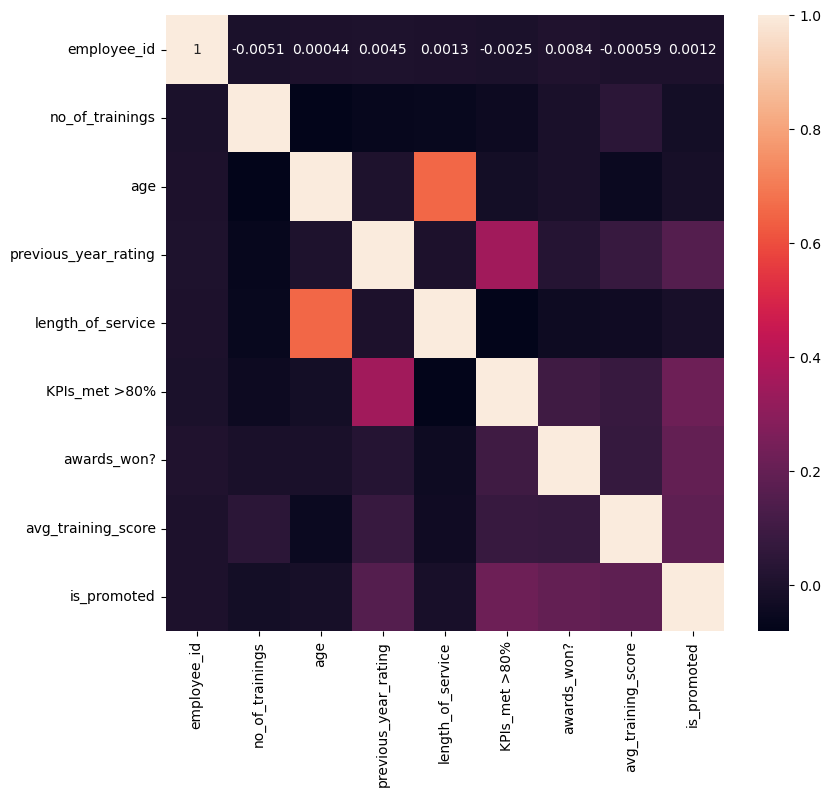

In [57]:
plt.figure(figsize=(9,8))
sns.heatmap(train[num_cols].corr(),annot=True)

In [58]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [110]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
cat_cols,num_cols

(Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object'),
 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
        'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
       dtype='object'))

In [291]:
# !pip install xgboost

In [289]:
# !pip list |grep xgboost

In [132]:
import sys
sys.path.append("/opt/anaconda3/envs/myenv/lib/python3.12/site-packages")

In [136]:
#import sci-kit libraries

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# ML Model
from sklearn.linear_model import LogisticRegression

#Classifaction Metrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,auc,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 


In [137]:
edu = {'Bachelor\'s':'Bachelor','Master\'s & above':'Master_and_above','Below Secondary':'Below_Secondary'}

In [138]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [139]:
train['education'].replace(edu,inplace=True)

In [140]:
train.education.value_counts()

education
Bachelor            36669
Master_and_above    14925
Below_Secondary       805
Name: count, dtype: int64

In [141]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [295]:
train.rename(columns={'KPIs_met >80%': 'KPIs_met', 'awards_won?': 'awards_won'}, inplace=True)

In [397]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [484]:
rename_cols={'KPIs_met >80%': 'KPIs_met', 'awards_won?': 'awards_won'}

In [485]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnRenamer(BaseEstimator, TransformerMixin):
    def __init__(self, rename_map):
        self.rename_map = rename_map

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.rename(columns=self.rename_map)

In [569]:
# Categorical pipeline
cat_pipe = Pipeline(steps=[
    ('rename_columns', ColumnRenamer(rename_cols)),
    ('impute_cat',SimpleImputer(strategy='most_frequent')), # Filling missing value for categorical data
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # Categorical Encoding
])

In [571]:
# Numerical pipeline
num_pipe = Pipeline(steps=[
     ('rename_columns', ColumnRenamer(rename_cols)),
    ('impute_num',SimpleImputer(strategy='median')), # Filling missing value for numerical data
    ('scale',StandardScaler()) # Scaling numerical data
])

In [575]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_cols+tgt_col).columns
cat_cols,num_cols

(Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object'),
 Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
        'KPIs_met', 'awards_won', 'avg_training_score'],
       dtype='object'))

In [573]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat_pipe',cat_pipe,cat_cols),
        ('num_pipe',num_pipe,num_cols)
    ]
)

In [577]:
model_pipeln_lr = Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [579]:
model_pipeln_lr

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recru...
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [581]:
model_pipe_pp= Pipeline(steps=[
    ('preprocess',preprocess)
])

In [493]:
model_pipe_pp

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object'))]))])

In [583]:
X = train.drop(columns=ign_cols+tgt_col)
X.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object')

In [585]:
y=train['is_promoted']

In [587]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [497]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [589]:
train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.2,random_state=42)
train_X.shape,val_X.shape,train_y.shape,val_y.shape

((43846, 12), (10962, 12), (43846,), (10962,))

In [499]:
train_X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score
3872,Sales & Marketing,region_19,Bachelor,m,other,1,31,5.0,5,1,0,48
11619,Technology,region_13,Master_and_above,m,sourcing,1,34,1.0,4,0,0,78
36178,Technology,region_22,Bachelor,m,other,3,29,4.0,4,1,0,77
29884,Sales & Marketing,region_2,Master_and_above,m,other,1,54,4.0,15,1,0,47
22968,R&D,region_7,Bachelor,m,sourcing,1,31,5.0,6,0,0,86


In [591]:
model_pipe_pp.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recru...')),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object'))]))])

In [593]:
train_X.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object')

In [595]:
model_pipeln_lr.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recru...
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [597]:
model_pipeln_lr.predict(test)

KeyError: "['KPIs_met', 'awards_won'] not in index"

In [503]:
train_pred=model_pipeln_lr.predict(train_X)
val_pred=model_pipeln_lr.predict(val_X)

In [504]:
print('Train confusion-matrix:\n',confusion_matrix(train_y,train_pred))
print('Test confusion-matrix:\n',confusion_matrix(val_y,val_pred))
print('Train Accuracy-Score:\n',accuracy_score(train_y,train_pred))
print('Test Accuracy-Score:\n',accuracy_score(val_y,val_pred))
print('Train classification-report:\n',classification_report(train_y,train_pred))
print('Test classification-report:\n',classification_report(val_y,val_pred))

Train confusion-matrix:
 [[39885   201]
 [ 2779   981]]
Test confusion-matrix:
 [[9992   62]
 [ 680  228]]
Train Accuracy-Score:
 0.9320348492450851
Test Accuracy-Score:
 0.9323116219667944
Train classification-report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     40086
           1       0.83      0.26      0.40      3760

    accuracy                           0.93     43846
   macro avg       0.88      0.63      0.68     43846
weighted avg       0.93      0.93      0.92     43846

Test classification-report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.79      0.25      0.38       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.67     10962
weighted avg       0.92      0.93      0.92     10962



In [505]:
def model_eval(train_X,val_X,train_y,val_y,model):
    # model = model_pipeln_RF.fit(train_X,train_y)
    train_pred=model.predict(train_X)
    val_pred=model.predict(val_X)
    print('Train confusion-matrix:\n',confusion_matrix(train_y,train_pred))
    print('Test confusion-matrix :\n',confusion_matrix(val_y,val_pred))
    print('Train classification-report:\n',classification_report(train_y,train_pred))
    print('Test classification-report :\n',classification_report(val_y,val_pred))
    print('Train Accuracy-Score:',accuracy_score(train_y,train_pred))
    print('Test Accuracy-Score :',accuracy_score(val_y,val_pred),'\n')
    print('Train ROC AUC SCORE :',roc_auc_score(train_y,train_pred))
    print('Test ROC AUC SCORE  :',roc_auc_score(val_y,val_pred),'\n')
    print('Train F1 SCORE :',f1_score(train_y,train_pred))
    print('Test F1 SCORE  :',f1_score(val_y,val_pred),'\n')
    print()
    print()
    
    # Curve based on 0 predict_proba
    print ('\nROC-Curve for 0')
    y_pred_proba = model.predict_proba(val_X)[:,0]
    plt.figure()
    fpr,tpr,thrsh = roc_curve(val_y,y_pred_proba)
    roc_auc = auc (fpr,tpr)
    print()
    plt.plot(fpr,tpr)
    plt.show()
    
    # Curve based on 1 predict_proba
    print ('\nROC-Curve for 1')
    y_pred_proba = model.predict_proba(val_X)[:,1]
    plt.figure()
    fpr,tpr,thrsh = roc_curve(val_y,y_pred_proba)
    roc_auc = auc (fpr,tpr)
    print()
    plt.plot(fpr,tpr)
    plt.show()
    
    

In [506]:
def model_eval_1(train_X,val_X,train_y,val_y,model):
    model.fit(train_X,train_y)
    train_pred=model.predict(train_X)
    val_pred=model.predict(val_X)
    print('Train confusion-matrix:\n',confusion_matrix(train_y,train_pred))
    print('Test confusion-matrix :\n',confusion_matrix(val_y,val_pred))
    print('Train classification-report:\n',classification_report(train_y,train_pred))
    print('Test classification-report :\n',classification_report(val_y,val_pred))
    print('Train Accuracy-Score:',accuracy_score(train_y,train_pred))
    print('Test Accuracy-Score :',accuracy_score(val_y,val_pred),'\n')
    print('Train ROC AUC SCORE :',roc_auc_score(train_y,train_pred))
    print('Test ROC AUC SCORE  :',roc_auc_score(val_y,val_pred),'\n')
    print('Train F1 SCORE :',f1_score(train_y,train_pred))
    print('Test F1 SCORE  :',f1_score(val_y,val_pred),'\n')
    print()
    print()
    
    # Curve based on 0 predict_proba
    print ('\nROC-Curve for 0')
    y_pred_proba = model.predict_proba(val_X)[:,0]
    plt.figure()
    fpr,tpr,thrsh = roc_curve(val_y,y_pred_proba)
    roc_auc = auc (fpr,tpr)
    print()
    plt.plot(fpr,tpr)
    plt.show()
    
    # Curve based on 1 predict_proba
    print ('\nROC-Curve for 1')
    y_pred_proba = model.predict_proba(val_X)[:,1]
    plt.figure()
    fpr,tpr,thrsh = roc_curve(val_y,y_pred_proba)
    roc_auc = auc (fpr,tpr)
    print()
    plt.plot(fpr,tpr)
    plt.show()
    

Train confusion-matrix:
 [[39885   201]
 [ 2779   981]]
Test confusion-matrix :
 [[9992   62]
 [ 680  228]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     40086
           1       0.83      0.26      0.40      3760

    accuracy                           0.93     43846
   macro avg       0.88      0.63      0.68     43846
weighted avg       0.93      0.93      0.92     43846

Test classification-report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.79      0.25      0.38       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.67     10962
weighted avg       0.92      0.93      0.92     10962

Train Accuracy-Score: 0.9320348492450851
Test Accuracy-Score : 0.9323116219667944 

Train ROC AUC SCORE : 0.6279450179454598
Test ROC AUC SCORE  : 0.6224673108824682 

Train F1 S

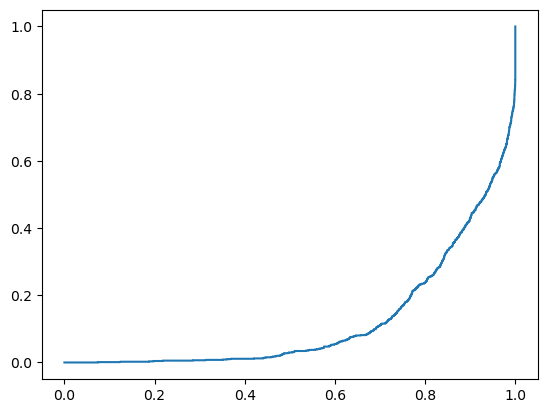


ROC-Curve for 1



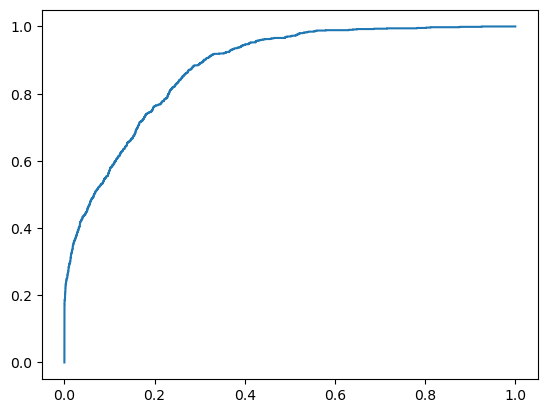

In [507]:
model_eval(train_X,val_X,train_y,val_y,model_pipeln_lr)

In [508]:
model_pipeln_DT = Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',DecisionTreeClassifier())
])

In [509]:
model_pipeln_DT.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

Train confusion-matrix:
 [[40086     0]
 [   11  3749]]
Test confusion-matrix :
 [[9409  645]
 [ 487  421]]
Train classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

Test classification-report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.39      0.46      0.43       908

    accuracy                           0.90     10962
   macro avg       0.67      0.70      0.68     10962
weighted avg       0.90      0.90      0.90     10962

Train Accuracy-Score: 0.9997491219267436
Test Accuracy-Score : 0.8967341725962416 

Train ROC AUC SCORE : 0.9985372340425531
Test ROC AUC SCORE  : 0.6997514084735381 

Train F1 S

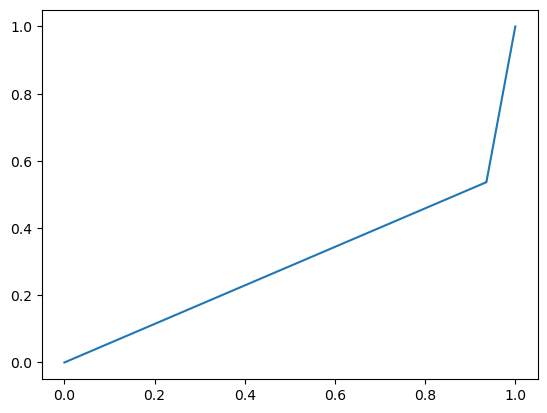


ROC-Curve for 1



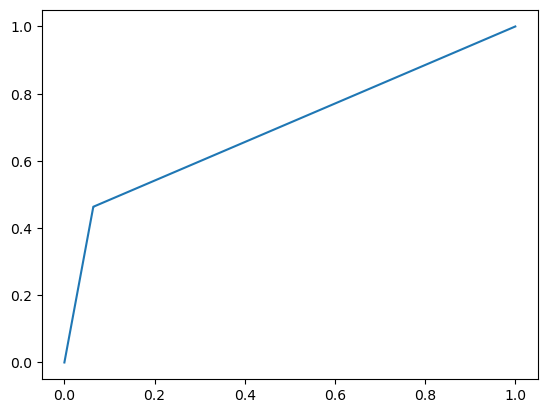

In [510]:
model_eval(train_X,val_X,train_y,val_y,model_pipeln_DT)

In [511]:

model_pipeln_RF = Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',RandomForestClassifier())
])

In [512]:
model_pipeln_RF.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('rename_columns',
                                                                   ColumnRenamer(rename_map={'KPIs_met >80%': 'KPIs_met',
                                                                                             'awards_won?': 'awards_won'})),
                                                                  ('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

Train confusion-matrix:
 [[40084     2]
 [    9  3751]]
Test confusion-matrix :
 [[9995   59]
 [ 642  266]]
Train classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

Test classification-report :
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.82      0.29      0.43       908

    accuracy                           0.94     10962
   macro avg       0.88      0.64      0.70     10962
weighted avg       0.93      0.94      0.92     10962

Train Accuracy-Score: 0.9997491219267436
Test Accuracy-Score : 0.9360518153621602 

Train ROC AUC SCORE : 0.9987782451240471
Test ROC AUC SCORE  : 0.643541615365134 

Train F1 SC

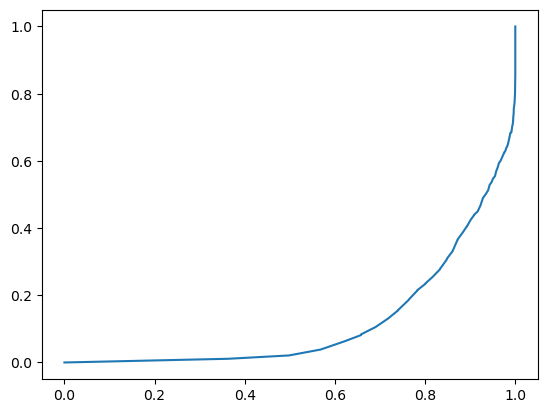


ROC-Curve for 1



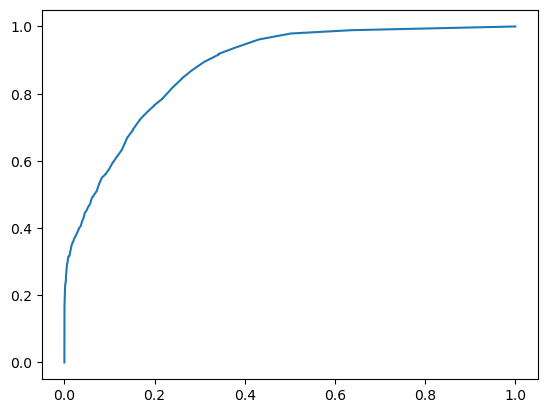

In [513]:
model_eval(train_X,val_X,train_y,val_y,model_pipeln_RF)

In [514]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [515]:
submission.is_promoted.value_counts()

is_promoted
0    23490
Name: count, dtype: int64

In [557]:
X.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met', 'awards_won', 'avg_training_score'],
      dtype='object')

In [555]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [553]:
model_pipeln_RF.named_steps['model']

RandomForestClassifier()

In [545]:
model_pipeln_RF.predict(test)

KeyError: "['KPIs_met', 'awards_won'] not in index"

In [ ]:
submission['is_promoted'] = model_pipeln_RF.predict(test)

In [ ]:
submission.to_csv('/kaggle/working/1_RF.csv',index=False)

In [ ]:
# import os
# print(os.listdir('/kaggle/working/'))
# os.getcwd()

In [ ]:
# from IPython.display import FileLink
# FileLink('/kaggle/working/1_RF.csv')

In [ ]:
# import os

# print(os.path.abspath('/kaggle/working/1_RF.csv'))


In [ ]:
# FileLink('/kaggle/working/1_RF.csv')

In [ ]:
# !cp /kaggle/working/1_RF.csv /kaggle/working/1_RF_copy.csv

# Since its a imbalanced data we proceeding with balancing of data using below techniques
        1. under-sampling
        2. over-sampling

In [ ]:
# from sklearn.imblearn import RandomUnderSampler

In [ ]:
# under-sampling
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under_sampling = RandomUnderSampler()

In [ ]:
train_y.value_counts()

In [ ]:
us_train_X,us_train_y = under_sampling.fit_resample(train_X,train_y)

In [ ]:
us_train_X.shape,us_train_y.shape

In [ ]:
# under_sampled logistic Regression
model_pipeln_lr.fit(us_train_X,us_train_y)
model_eval(us_train_X,val_X,us_train_y,val_y,model_pipeln_lr)

In [ ]:
# under_sampled Decision Tree
model_pipeln_DT.fit(us_train_X,us_train_y)
model_eval(us_train_X,val_X,us_train_y,val_y,model_pipeln_DT)

In [ ]:
# under_sampled Random Forest
model_pipeln_RF.fit(us_train_X,us_train_y)
model_eval(us_train_X,val_X,us_train_y,val_y,model_pipeln_RF)

In [ ]:
# over-sampling

from imblearn.over_sampling import RandomOverSampler

In [ ]:
over_sampling = RandomOverSampler()

In [ ]:
train_X.shape,train_y.shape

In [ ]:
os_train_X,os_train_y = over_sampling.fit_resample(train_X,train_y)

In [ ]:
os_train_X.shape,os_train_y.shape

In [ ]:
import time

In [ ]:
# over_sampled logistic Regression
%time
model_pipeln_lr.fit(os_train_X,os_train_y)
model_eval(os_train_X,val_X,os_train_y,val_y,model_pipeln_lr)


In [ ]:
# over_sampled Decision Tree
%time
model_pipeln_DT.fit(os_train_X,os_train_y)
model_eval(os_train_X,val_X,os_train_y,val_y,model_pipeln_DT)

In [ ]:
os_train_X.shape,os_train_y.shape

In [ ]:
# over_sampled Random Forest
%time
model_pipeln_RF.fit(os_train_X,os_train_y)
model_eval(os_train_X,val_X,os_train_y,val_y,model_pipeln_RF)

In [ ]:
model_pipeln_RF.named_steps['model'].feature_importances_

In [ ]:
model_pipeln_RF.named_steps['model'].feature_importances_.shape

In [ ]:
os_train_X.columns

In [ ]:
df=os_train_X

In [ ]:
# resized_df.shape
df.shape

In [ ]:
df['is_promoted']=os_train_y

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:

# Randomly select 6 samples
resized_df = df.sample(frac=0.1,random_state=42)

In [ ]:
resized_df.shape

In [ ]:
resized_df.is_promoted.value_counts()

In [ ]:
X=resized_df.drop(columns='is_promoted')

In [ ]:
y=resized_df['is_promoted']

In [ ]:
train_X,val_X,train_y,val_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

In [ ]:
#GridSearchcv
param_distributions = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['elasticnet','l2'],
    'model__class_weight':['balanced',None],
    'model__solver':['saga',None]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__criterion':['entropy','gini'],
    'model__max_depth':[10,20,30,50],
    },
     {
    'model': [RandomForestClassifier()],
    'model__n_estimators':[50,100,200,300],
    'model__criterion':['entropy','gini'],
    # 'model__max_depth':[10,20,30,50]
    },
    {  'model': [KNeighborsClassifier()],
       'model__n_neighbors':[5,10,20,30],
       'model__weights':['uniform','distance']
    }
]




In [ ]:
#GridSearchCV 
# grid= GridSearchCV(estimator=model_pipeln_RF,param_grid=params,cv=10,scoring='roc_auc',verbose=3)

In [ ]:
# grid.fit(os_train_X,os_train_y)

In [ ]:
#GridSearchCV 
randCV= RandomizedSearchCV(estimator=model_pipeline,param_distributions=params,cv=10,scoring='roc_auc',verbose=3)

In [ ]:
# randCV.fit(train_X,train_y)

In [ ]:
randCV.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_pipe',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=300))])

In [ ]:
randCV.best_params_

In [ ]:
randCV.best_score_

In [ ]:
randCV.best_params_

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', RandomForestClassifier(criterion='entropy', n_estimators=300)) 
])

In [ ]:
 rs=RandomForestClassifier(criterion='entropy', n_estimators=300)

In [ ]:
model_eval_1(train_X,val_X,train_y,val_y,model_pipeline)

In [ ]:
model_pipeline.predict(test)

In [ ]:
submission['is_promoted'] = model_pipeline.predict(test)
submission.to_csv('/kaggle/working/RandCV_best_param.csv',index=False)

In [ ]:
train_X,val_X,train_y,val_y=train_test_split(os_train_X,os_train_y,test_size=0.2,random_state=42)

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

In [ ]:
clf1 = RandomForestClassifier()
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier() 
clf4 = xgb.XGBClassifier(eval_metric='auc')

model = VotingClassifier(estimators=[('rf', clf1), ('ada', clf2),('gbm', clf3), ('xgb', clf4)], voting='soft')

In [ ]:
train_X.shape,val_X.shape,train_y.shape,val_y.shape

In [ ]:
type(train_y)

In [ ]:
train_y.value_counts()

In [ ]:
model_eval_1(train_X,val_X,train_y,val_y,model_pipeline)

In [ ]:
submission['is_promoted'] = model_pipeline.predict(test)
submission.to_csv('/kaggle/working/Voting.csv',index=False)

In [ ]:
model_eval_1(train_X,val_X,train_y,val_y,model_pipeline)

In [ ]:
#Stacking
estimators = [
    ('dt',DecisionTreeClassifier()),
    ('rf1',RandomForestClassifier()),
    ('gbm',GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200))
]

model = StackingClassifier(estimators=estimators,final_estimator=xgb.XGBClassifier())

In [ ]:
model_eval_1(train_X,val_X,train_y,val_y,model_pipeline)

In [ ]:
submission['is_promoted'] = model_pipeline.predict(test)
submission.to_csv('/kaggle/working/Stacking.csv',index=False)

In [ ]:
model_eval_1(train_X,val_X,train_y,val_y,model_pipeline)

In [ ]:
submission['is_promoted'] = model_pipeline.predict(test)

In [ ]:
submission.shape

In [ ]:
submission.to_csv('/kaggle/working/Stacking_RF.csv',index=False)

In [ ]:
#pickling

import joblib

In [ ]:
joblib.dump(model_pipeline,'/kaggle/working/Stacking_XGB_model.pkl')

In [ ]:
import sklearn
print(sklearn.__version__)
